### importing libraries

In [68]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import style
%matplotlib inline
warnings.filterwarnings("ignore")
from copy import deepcopy

### Loading dataset

In [69]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df=deepcopy(data)

In [71]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
df=df.set_index(["Id"])

In [73]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
df.shape

(150, 5)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### checking null values

In [76]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### correlation between variables

<AxesSubplot: >

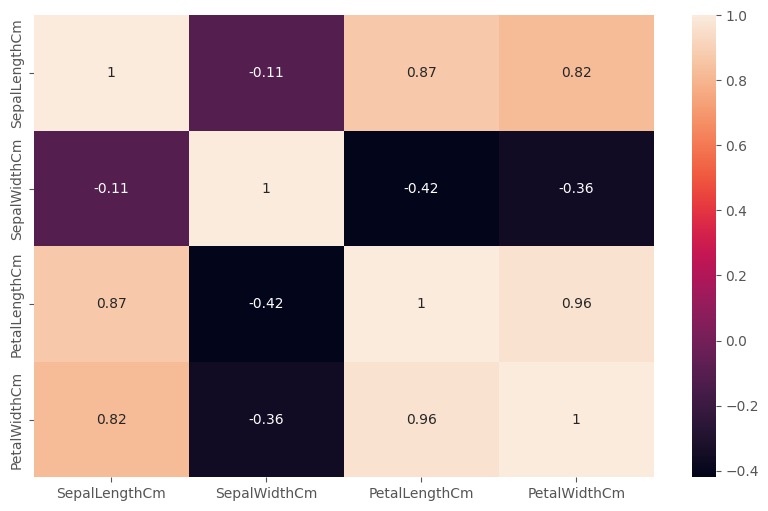

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)


### ploting graph

Text(0.5, 1.0, 'SepalLengthCm VS PetalLengthCm ')

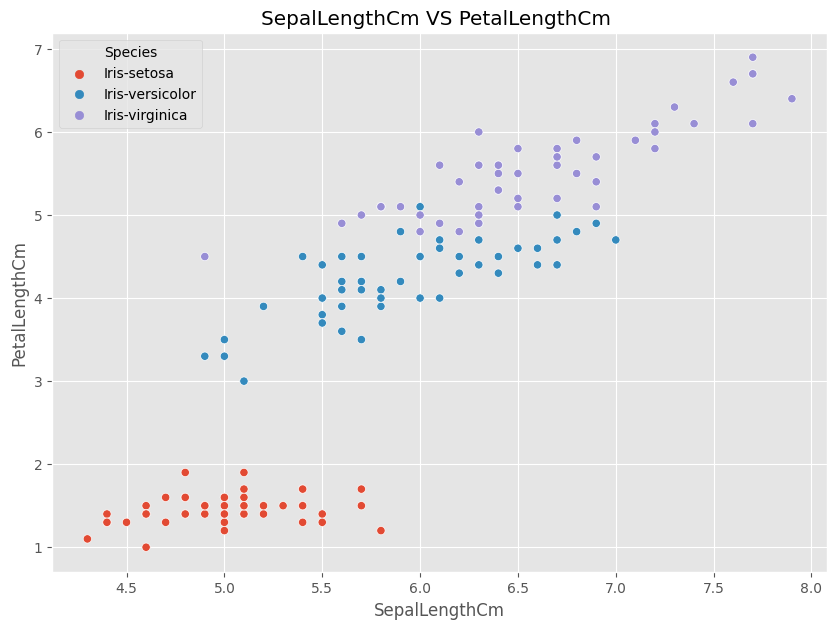

In [78]:
style.use("ggplot")
plt.figure(figsize=(10,7))
sns.scatterplot(x="SepalLengthCm",y="PetalLengthCm",data=df,hue="Species")
plt.title("SepalLengthCm VS PetalLengthCm ")


Text(0.5, 1.0, 'PetalLengthCm VS PetalWidthCm ')

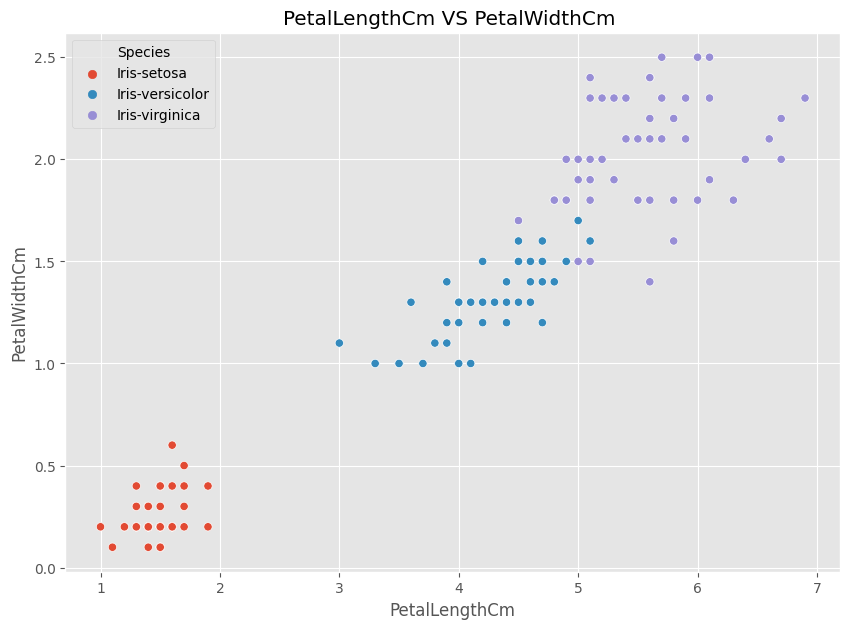

In [79]:
style.use("ggplot")
plt.figure(figsize=(10,7))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df,hue="Species")
plt.title("PetalLengthCm VS PetalWidthCm ")

### Converting target to numeric values

In [80]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [81]:
df['Species']=df['Species'].replace({"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3})

In [82]:
df.Species.unique()

array([1, 2, 3], dtype=int64)

In [83]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


### Splitting data

In [84]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

### Scaling our data

In [87]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### importing model K-Nearest Neighbours

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# train model
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
print("Accuracy of model at K=4 is",np.mean(cross_val_score(knn, X_train,y_train,cv=5,scoring="accuracy")))


Accuracy of model at K=4 is 0.9416666666666667


### choosing the best K

#### method 1

Minimum error:- 0.050000000000000044 at K = 4


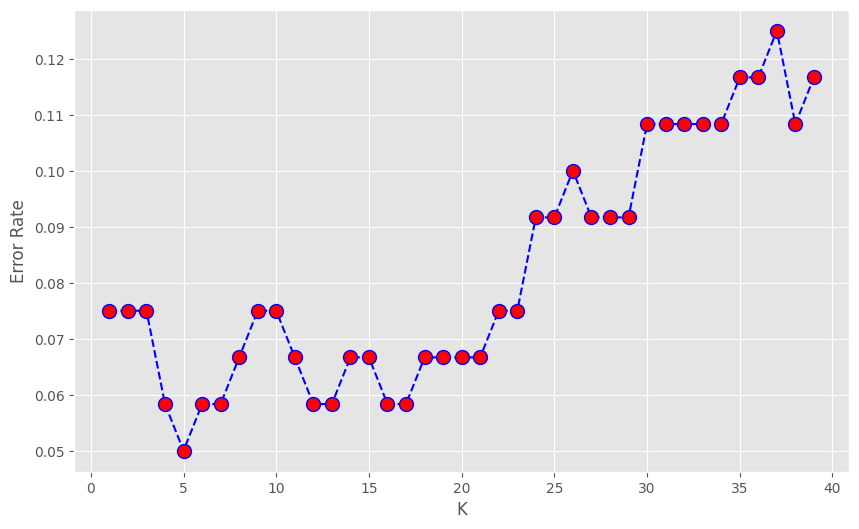

In [109]:
error_rate=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    error_rate.append(1-np.mean(cross_val_score(knn, X_train,y_train,cv=5,scoring="accuracy")))

style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xlabel("K")
plt.ylabel("Error Rate")
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))



Maximum accuracy:- 0.95 at K = 4


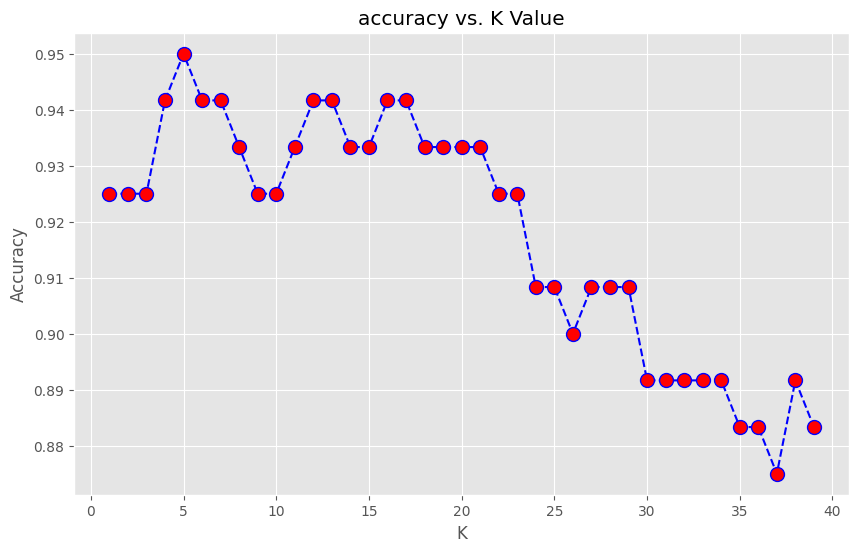

In [108]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    acc.append(np.mean(cross_val_score(knn, X_train,y_train,cv=5,scoring="accuracy")))
    
plt.figure(figsize=(10,6))
style.use("ggplot")
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Now we see the  results. We got the accuracy of 1 at K=6. As we already derived the error plot and got the minimum error at k=6 

#### method 2:validation_curve

In [106]:
from sklearn.model_selection import validation_curve

Text(0, 0.5, 'Accuracy')

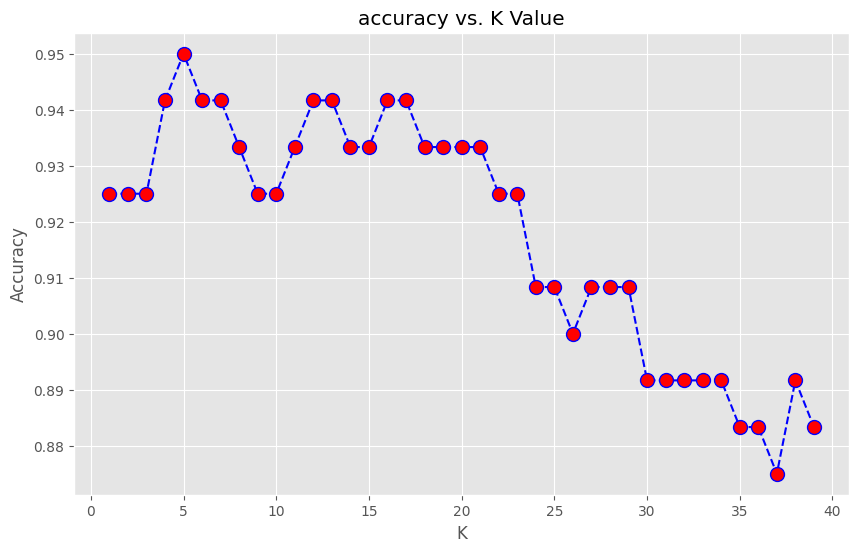

In [112]:
model=KNeighborsClassifier()
k=np.arange(1,40)
train_score,val_score=validation_curve(model,X_train,y_train,param_name='n_neighbors',param_range=k,cv=5)

plt.figure(figsize=(10,6))
style.use("ggplot")

plt.plot(k,val_score.mean(axis=1),color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')


we got the same curve as the previous one

###Grid_search

In [113]:
from sklearn.model_selection import GridSearchCV


In [114]:
param_grid={
    'n_neighbors':np.arange(1,40),
    'metric':['euclidean','manhattan']
}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [115]:
grid.best_score_

0.95

In [116]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

#### ploting decision boundaries

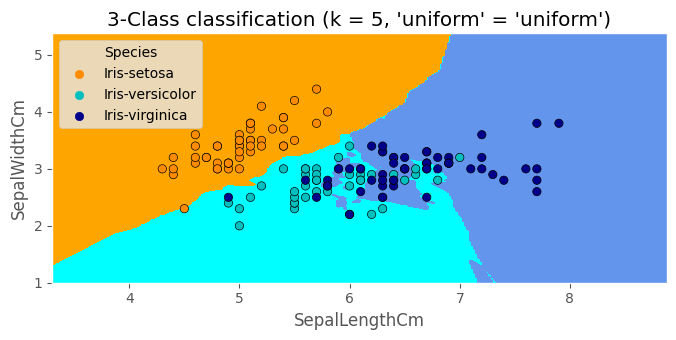

In [129]:
from matplotlib.colors import ListedColormap
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
h = .02
x_min, x_max = df["SepalLengthCm"].min() - 1, df["SepalLengthCm"].max() + 1
y_min, y_max = df["SepalWidthCm"].min() - 1, df["SepalWidthCm"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
X=X[["SepalLengthCm","SepalWidthCm"]]
clf =KNeighborsClassifier(5, weights='uniform')
clf.fit(X, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", data=data,hue='Species',
palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i, 'uniform' = '%s')"
% (5, 'uniform'))

plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

plt.show()





#### evaluation

In [130]:
model=grid.best_estimator_
score=model.score(X_test,y_test)
score

0.9666666666666667

<AxesSubplot: >

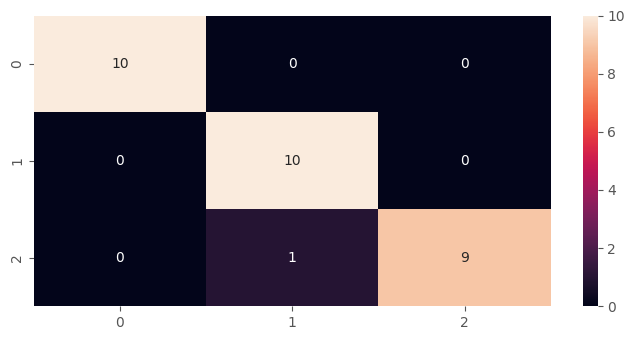

In [135]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True)

In [134]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

